In [ ]:
!mamba install pandas
!mamba install earthpy
!mamba install matplotlib
!mamba install seaborn

In [2]:
import warnings
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

matplotlib_axes_logger.setLevel('ERROR')
warnings.filterwarnings('ignore')
sns.set(font_scale=1.5, style="whitegrid")


In [3]:
data_path = './data/colorado-flood'
boulder_precip_2003_2013 = pd.read_csv(f'{data_path}/precipitation/805325-precip-daily-2003-2013.csv',
                                       parse_dates=['DATE'], index_col=['DATE'], na_values=['999.99'])


In [4]:
boulder_precip_2003_2013


,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
...,...,...,...,...,...,...,...,...
2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,[,
2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,],
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,0.1,,


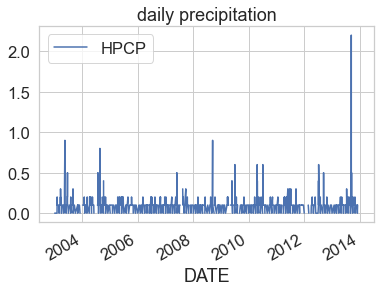

In [5]:
boulder_precip_2003_2013.plot(y='HPCP', title='daily precipitation')
plt.show()


In [6]:
boulder_precip_2003_2013["HPCP"].describe()

count    1746.000000
mean        0.111856
std         0.093222
min         0.000000
25%         0.100000
50%         0.100000
75%         0.100000
max         2.200000
Name: HPCP, dtype: float64

In [8]:
precip_2005 = boulder_precip_2003_2013['2005']
precip_2005.head()

In [9]:
# Remove missing data values
precip_2005_clean = precip_2005.dropna()

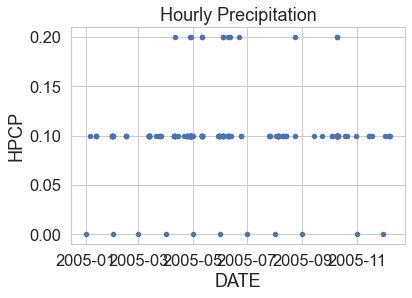

In [10]:
# Plot the data using pandas
precip_2005_clean.reset_index().plot(x="DATE",
                                     y="HPCP",
                                     title="Hourly Precipitation",
                                     kind="scatter")
plt.show()


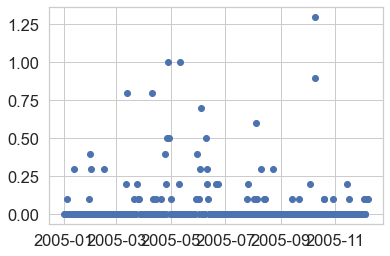

In [14]:
precip_2005_daily = precip_2005_clean.resample("D").sum()
# Plot the data using native matplotlib
f, ax = plt.subplots()
ax.scatter(x=precip_2005_daily.index.values,
           y=precip_2005_daily["HPCP"])
plt.show()


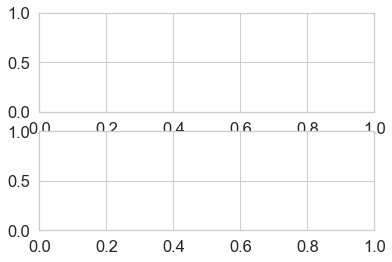

In [15]:
f, (ax1, ax2) = plt.subplots(2,1)
ax1.